# CSCI 4622 - Spring 2018 - Practicum 
***


This practicum is due on Moodle by **11:59pm on Thursday May 3rd**. 

**Here are the rules:** 

4. Your work must be done entirely on your own. You may **NOT** collaborate with classmates or anyone else.  
3. You may **NOT** post to message boards or other online resources asking for help. 
5. You may **NOT** use late days on the practicum nor can you drop your practicum grade. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources. 
2. You may consult alternate sources like blog posts or technical papers, but you may **NOT** copy code from these sources. 
3. Any additional non-course sources that you use should be clearly cited (with links) in the **References** section at the bottom of this notebook. 
7. Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

Violation of the above rules will result in an **F** in the course and a trip to **Honor Council** 

***

**By writing your name below you agree to abide by the given rules:**

**Name**: Hee Su Chang

**Kaggle Username**: hech1638

***


**NOTES**: 

- You do not need to implement everything from scratch.  At this point you should be leveraging Sklearn as much as you can. 
- If you have a clarifying question, please post it as a **PRIVATE** message to me on Piazza. 
- Part of the goal of this assignment is to see if you can stand on your own.  Please do not ask me to help you debug code or check if your answers are correct. Most of the implementation details necessary to complete this practicum can be found in the Hands-On notebooks or the Sklearn documentation.  
- You'll notice that the point totals below do not add up to 100.  This is because 10 out of the 100 points will be attributed to **style**.  To earn full credit for style your analysis should be concise and well-organized, your code should be readable and well-commented, and you should use plots and graphics to support your conclusions whenever appropriate.  

In [3]:
import pickle, gzip 
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

### [35 points] Problem 1: Building Classifiers for Fashion MNIST 
***

The classic MNIST Handwritten Digit data set has been a staple in the machine learning literature since the beginning of time (i.e. the late 90's).  However, machine learning practitioners have grown tired of the rusty digits and have recently begun to create and explore new, more interesting data sets. Some popular alternatives to emerge recently are [EMNIST](https://www.kaggle.com/crawford/emnist), [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist), and [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). In this problem you will explore the latter. 

Fashion MNIST is comprised of $28 \times 28$ pixel gray-scale images of clothing, with classes corresponding to things like tops, trousers, coats, dresses, and various types of shoes.  The data set that we'll work with corresponds to a small subset of Fashion MNIST with 1500 examples from each of five distinct classes (tops, trousers, coats, sneakers, and ankle boots). 

Execute the following cell to load the data. 

In [58]:
f = gzip.open('data/fashion_mnist_subset.pklz', 'rb')
X_all, y_all = pickle.load(f)
f.close()

In **Parts A-C** you will construct various tuned classifiers for making predictions on Fashion MNIST.  For each classifier you should: 
- Describe and motivate any transformations on the pixel data that you found helpful/necessary to make your model work well. 
- Describe and justify your process for determining optimal hyperparameters for each model. Support your decisions with validation studies and associated graphics.  Do **NOT** just report the hyperparameters that worked best.  
- Describe how you evaluated your models during your process (i.e. did you use a validation set, did you do cross-validation, etc). 
- Report the final optimal hyperparameters that you used as well as the accuracy of your final model. 

The following describes how I approached each model and how to determine what hyperparameters to test out.

I evaluated the accuracy using a mean of cross-validation accuracy scores over splitting the data into set train-validation sets because I wanted to make sure that the results didn't depend on one particular split of the data. Finding the mean of multiple splits using cross-validation helps which is why I decided to use it to evaluate every model for different hyperparameters.

I limited myself to experimenting with hyperparameters that I either understood from lecture or by looking at the SKLearn documentation since all my models were imported from SKLearn. I would experiment with one parameter at a time and try out values for each parameters that were on each side (smaller or positive) of the default value given by SKlearn. 

**Part A**: Construct a K-Nearest Neighbors classifier to make predictions on the data. 

In [59]:
from sklearn.model_selection import train_test_split 


In [9]:
from sklearn.neighbors import KNeighborsClassifier

weights = ['uniform','distance']
knn1 = []
for i in weights:
    knn = KNeighborsClassifier(weights=i)
    knn_score = cross_val_score(knn, X_all, y_all, cv=5, scoring='accuracy')
    knn1.append(np.mean(knn_score))
print(knn1)

[0.9644, 0.9646666666666667]


We learned in class that KNN could use uniform weights or distance-based weights for each query point, so I tried both and found that the distance-based weight had a slightly higher mean score from cross-validation with a value of 0.9646666666666667.

In [10]:
k = [3,4,5,7,10]
knn2 = []
for i in k:
    knn = KNeighborsClassifier(i, weights='distance')
    knn_score = cross_val_score(knn, X_all, y_all, cv=5, scoring='accuracy')
    knn2.append(np.mean(knn_score))
    print('K=',i,':',np.mean(knn_score))

K= 3 : 0.9648
K= 4 : 0.9657333333333333
K= 5 : 0.9646666666666667
K= 7 : 0.9642666666666667
K= 10 : 0.9637333333333332


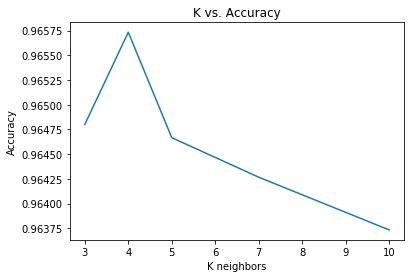

In [11]:
plt.plot(k, knn2)
plt.title('K vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K neighbors')
plt.show()

After experimenting with the number of neighbors that are queried with distance-weighted KNN, I found that K=4 gave the highest accuracy of 0.9657333333333333. After that, the graph clearly indicates overfitting as we see a continuous decline. I didn't worry about the algorithm that queries the distances because it doesn't affect accuracy and only performance. If not specified, SKLearn's KNN apparently can decide the optimal algorithm anyway based on the type of data, so we all good.

**Part B**: Construct a Linear Support Vector Machine classifier to make predictions on the data. 

In [12]:
from sklearn.svm import LinearSVC
C = [0.1, 0.5, 1, 3, 5, 10]
svc1 = []
for i in C:
    lsvm = LinearSVC(C=i)
    lsvm_score = cross_val_score(lsvm, X_all, y_all, cv=5, scoring='accuracy')
    svc1.append(np.mean(lsvm_score))
    print('C=',i,':',np.mean(lsvm_score))

C= 0.1 : 0.9562666666666665
C= 0.5 : 0.9565333333333331
C= 1 : 0.9565333333333333
C= 3 : 0.9566666666666667
C= 5 : 0.9562666666666667
C= 10 : 0.9565333333333333


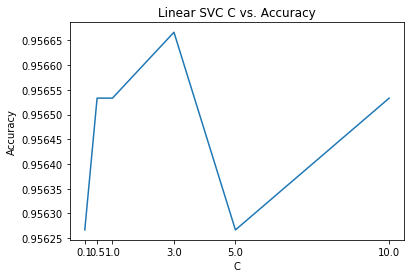

In [25]:
plt.plot(C,svc1)
plt.title('Linear SVC C vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xticks(C)
plt.show()

After experimenting with different Margin values, I found that the C=3 gave the highest accuracy 0.9566666666666667. It seems to start overfitting after that.

**Part C**: Construct a Feed-Forward Neural Network classifier to make predictions on the data. We recommend using Sklearn's [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) rather than the code you wrote in Homework 4. In our experiments we found training an MLPClassifier to take no more than a minute for reasonable choices of architectures. 

In [62]:
from sklearn.neural_network import MLPClassifier

In [15]:

layers = [(50),(100),(200),(400),(527),(100,25),(400,100,25)]
mlp1 = []
for i in layers:
    mlpc = MLPClassifier(i,solver='lbfgs')
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp1.append(np.mean(mlpc_score))
    print('Layer=',i,':',np.mean(mlpc_score))

Layer= 50 : 0.9646666666666667
Layer= 100 : 0.9663999999999999
Layer= 200 : 0.9045333333333334
Layer= 400 : 0.9613333333333334
Layer= 527 : 0.9119999999999999
Layer= (100, 25) : 0.8989333333333333
Layer= (400, 100, 25) : 0.8349333333333334


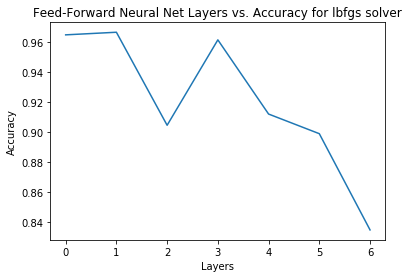

In [19]:
plt.plot(mlp1)
plt.title('Feed-Forward Neural Net Layers vs. Accuracy for lbfgs solver')
plt.ylabel('Accuracy')
plt.xlabel('Layers')
plt.show()

SKlearn's MLP Classifier supports multiple solvers. Of these I decided to test 'adam', an optimized solver based off of SGD and 'lbfgs', which is the default of SKlearn. The graph above shows the accuracies I got for a few layers I tried for the 'lbfgs' solver. I chose my hidden layers based on studies that I found people talk about on Stack Overflow (Ref 1 under References).

Some of the rules I stricty followed were:
- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.

I also experimented with pyramid schemes and a formula on that thread, along with numbers around the default number of hidden layers.

The one layer of (100) hidden layers had the best accuracy 0.9663999999999999 for the 'lbfgs' solver.


In [13]:
alphas = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
mlp2 = []
for i in alphas:
    mlpc = MLPClassifier((100),alpha=i, solver='lbfgs')
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp2.append(np.mean(mlpc_score))
    print('Alpha=',i,':',np.mean(mlpc_score))

Alpha= 1e-06 : 0.7465333333333333
Alpha= 1e-05 : 0.9632000000000002
Alpha= 0.0001 : 0.9056
Alpha= 0.001 : 0.9622666666666666
Alpha= 0.01 : 0.9638666666666668
Alpha= 0.1 : 0.9630666666666666


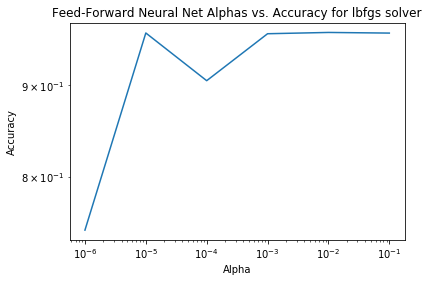

In [15]:
plt.loglog(alphas,mlp2)
plt.title('Feed-Forward Neural Net Alphas vs. Accuracy for lbfgs solver')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.show()

After experimenting with different alpha values (L2 regularization parameter), I found that 0.01 gives the highest accuracy 0.9638666666666668. However, this is still smaller than the accuracy 0.9663999999999999 I got without alphas. This difference is negatable however, since there is a little variability with cross validation. The conclusion we can reach is that the regularization won't help. The default value was probably the most ideal.

In [28]:

layers = [(50),(100),(200),(400),(527),(100,25),(400,100,25)]
mlp_nostop = []
for i in layers:
    mlpc = MLPClassifier(i,early_stopping=False)
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp_nostop.append(np.mean(mlpc_score)) 
    print('Layer=',i,':',np.mean(mlpc_score))

Layer= 50 : 0.9573333333333334
Layer= 100 : 0.9565333333333333
Layer= 200 : 0.9562666666666667
Layer= 400 : 0.9558666666666665
Layer= 527 : 0.9649333333333334
Layer= (100, 25) : 0.9554666666666666
Layer= (400, 100, 25) : 0.9522666666666666


In [33]:

layers = [(50),(100),(200),(400),(527),(100,25),(400,100,25)]
mlp3 = []
for i in layers:
    mlpc = MLPClassifier(i,early_stopping=True)
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp3.append(np.mean(mlpc_score)) 
    print('Layer=',i,':',np.mean(mlpc_score))

Layer= 50 : 0.9473333333333335
Layer= 100 : 0.9518666666666666
Layer= 200 : 0.9557333333333334
Layer= 400 : 0.9609333333333332
Layer= 527 : 0.9609333333333334
Layer= (100, 25) : 0.9468
Layer= (400, 100, 25) : 0.9544


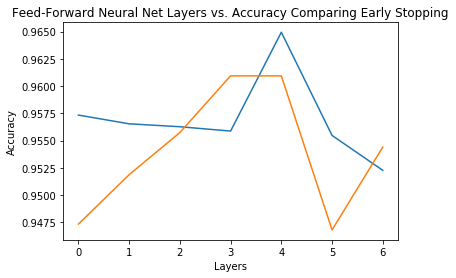

In [34]:
plt.plot(mlp_nostop)
plt.plot(mlp3)
plt.title('Feed-Forward Neural Net Layers vs. Accuracy Comparing Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Layers')
plt.show()

Next, I experimented with the 'adam' solver. With this solver, you can choose whether to enable early stopping, which determines when to stop based on validation of 10% of the data given or to disable early stopping altogether. I compared these two with the different layers I used for 'lbfgs'. And we can see that though early stopping works for some of the smaller layers, not early stopping helps for most of the later layers with more hidden layers. The best architecture was (527) of accuracy 0.9609333333333334 without early stopping. This architecture was found from a formula from Ref. 1. This surprised me because I thought early stopping would give better results. So far, this proves to be less accurate than 'lbfgs' but we still have learning rates and regularization to mess with.

In [38]:
eta = [0.0001, 0.001, 0.01, 0.1]
mlp5 = []
for i in eta:
    mlpc = MLPClassifier((527),learning_rate_init=i,early_stopping=False)
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp5.append(np.mean(mlpc_score))
    print('Learning rate=',i,':',np.mean(mlpc_score))

Learning rate= 0.0001 : 0.9526666666666668
Learning rate= 0.001 : 0.9577333333333333
Learning rate= 0.01 : 0.9582666666666666
Learning rate= 0.1 : 0.7388


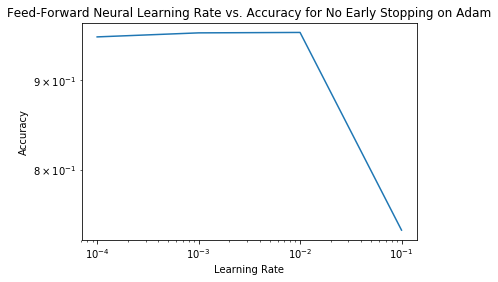

In [41]:
plt.loglog(eta,mlp5)
plt.title('Feed-Forward Neural Learning Rate vs. Accuracy for No Early Stopping on Adam')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.xticks(eta)
plt.show()

With the layer architecture I found with 'adam' I then experimented with the initial learning rate. 0.01 gave the best accuracy of 0.9582666666666666. This went down from before I messed around with the learning rate, but variablility of cross validation is also a factor. I found that having patience with this learning rate helped in the next step with regularization.

In [23]:
alphas = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
mlp6 = []
for i in alphas:
    mlpc = MLPClassifier((527),learning_rate_init=0.01,alpha=i, early_stopping=False)
    mlpc_score = cross_val_score(mlpc, X_all, y_all, cv=5, scoring='accuracy')
    mlp6.append(np.mean(mlpc_score))
    print('Alpha=',i,':',np.mean(mlpc_score))

Alpha= 1e-06 : 0.9669333333333332
Alpha= 1e-05 : 0.9648
Alpha= 0.0001 : 0.9613333333333334
Alpha= 0.001 : 0.9686666666666666
Alpha= 0.01 : 0.9668000000000001
Alpha= 0.1 : 0.9590666666666667


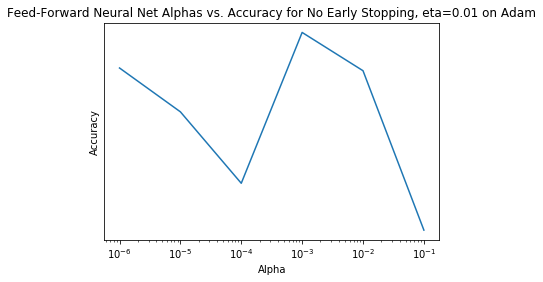

In [24]:
plt.loglog(alphas,mlp6)
plt.title('Feed-Forward Neural Net Alphas vs. Accuracy for No Early Stopping, eta=0.01 on Adam')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.show()

Lastly, I try regularization on top of the learning rates. I deleted the cell I had where I only tried regularization without the learning rate, but overall, it got lower accuracy than doing regularization on top of learning rate like I just did. The highest accuracy alpha was 0.001 which gave an accuracy of 0.9686666666666666.

**Part D**: Which of the three models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

MLPClassifier((527),learning_rate_init=0.01,alpha=i, early_stopping=False) gave me overall the best results. I was surprised though, that the difference between the neural network and KNN wasn't that different. It required a lot of tweaking to get this small improvement. I always thought that such a simple algorithm like KNN could compete with complicated mechanisms like neural networks.

**Part E**: For the best model you identified in **Part D**, perform a train-validation split and construct a confusion matrix based on predictions on the validation set.  Which classes tend to get confused with each other the most? Are there any classes for which your model performs exceptionally well?  Plot at least one misclassified example from each of the often-confused classes and suggests reasons why this behavior might occur.   

[[299   3   2   0   0]
 [ 35 245   0   0   0]
 [ 48   2 242   1   0]
 [  0   0   0 296  10]
 [  1   0   0  41 275]]


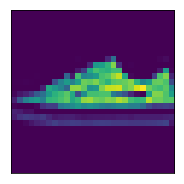

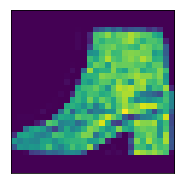

In [84]:
X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, test_size=0.2)

from sklearn.metrics import confusion_matrix

best_model = MLPClassifier((527),learning_rate_init=0.01,alpha=i, early_stopping=False)
best_model.fit(X_train,y_train)
print(confusion_matrix(y_valid, best_model.predict(X_valid),labels=[0,1,4,7,9]) )

def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(28,28));
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)
coat = []
sneakers = []
tops = []
ankle_boots = []
trousers = []
for i, y in enumerate(y_valid):
    #print(y)
    if y == 0:
        tops = X_valid[i]
    if y == 1:
        ankle_boots = X_valid[i]
    if y == 4:
        coat = X_valid[i]
    if y == 7:
        sneakers = X_valid[i]
    if y == 9:
        trousers = X_valid[i]
#print(coat)
view_digit(sneakers)
view_digit(trousers)

Coats were classified the best. Sneakers were classified the worst. They were often misclassified as trousers. I believe the pigment of sneakers (bright) were mixed up with the pigment of trousers(also bright).

### [30 points] Problem 2: Predicting Authors of Presidential Election Tweets 
***

For the first time in history, the run-up to the 2016 presidential election saw candidates move a large portion of their campaigns from the traditional debating lectern to the Twitterverse. In this problem you will construct various classifiers to predict whether a tweet was sent by @HillaryClinton ($y=0$) or @realDonaldTrump ($y=1$). 

The data set contains $4000$ tweets that have been cleaned by converting all text to lowercase, removing punctuation, and removing hypertext links. In order to preserve hashtags we've replaced the typical # with the string `hashtag` (e.g. `#GiantMeteor` would be converted to `hashtaggiantmeteor`).  

Execute the following cell to load the data. 

In [27]:
f = gzip.open('data/clean_tweets.pklz','rb')
text_all, y_all = pickle.load(f)
f.close()

**Part A**: Vectorize the text features using the Bag-of-Words text model **while removing stop words**.  Then answer the following questions: 

- How many distinct text features are there in the data after stop words are removed? 
- How many distinct **HashTags** are there in the data? 
- Which candidate uses HashTags the most frequently? 

In [28]:


vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(text_all, y_all)
count_HashTags = 0
terms = vectorizer.get_feature_names()
hashtag_indexes = []
for i, word in enumerate(terms):
    if not word.find('hashtag', 0, 7) == -1:
        count_HashTags = count_HashTags + 1
        hashtag_indexes.append(i)
print('Number of distinct text features',len(vectorizer.get_feature_names()))
print('Number of distinct HashTags',count_HashTags)
hashtag_per_cand = [0, 0]
for i, doc in enumerate(bag_of_words.toarray()):
    hashtag_count = 0
    for index in hashtag_indexes:
        if doc[index] == 1:
            hashtag_count += 1
    hashtag_per_cand[y_all[i]] += hashtag_count
print('Hashtags for Hilary:',hashtag_per_cand[0],'Hashtags for Trump:',hashtag_per_cand[1])

Number of distinct text features 7509
Number of distinct HashTags 243
Hashtags for Hilary: 258 Hashtags for Trump: 800


**Part B**: Construct a Logistic Regression classifier with L2 regularization to make predictions on the data. Exactly as in **Problem 1**, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. 

In [29]:


lam = [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6]
logreg = []
for i in lam:
    log = LogisticRegression(C=i)
    log_score = cross_val_score(log, bag_of_words.toarray(), y_all, cv=5, scoring='accuracy')
    logreg.append(np.mean(log_score))
print(logreg)

[0.8684999999999998, 0.89975, 0.909, 0.9075, 0.9027499999999999, 0.8942500000000001, 0.8885, 0.88575]


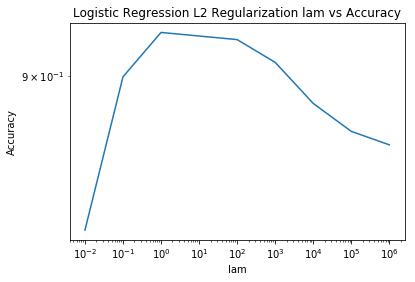

In [31]:
plt.loglog(lam,logreg)
plt.title('Logistic Regression L2 Regularization lam vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('lam')
plt.show()

I got the best accuracy with lam = 1 with an accuracy of 0.909.

In [19]:

all_test_scores = []
for ii in range(40):
    scores = cross_validate(LogisticRegression(C=1), bag_of_words.toarray(), y_all, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None))
    all_test_scores = all_test_scores + list(scores["test_score"])



Bootstrapped Mean: 0.913
Bootstrapped 95% CI: [0.894, 0.931]


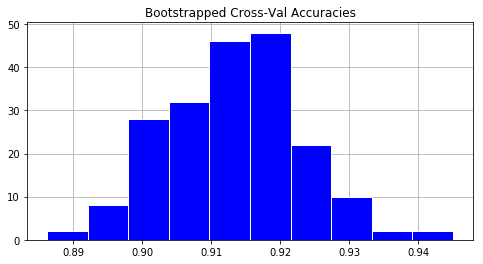

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
pd.DataFrame(all_test_scores).hist(ax=ax, color="blue", edgecolor="white")
ax.set_axisbelow(True)
ax.set_title("Bootstrapped Cross-Val Accuracies")
print("Bootstrapped Mean: {:.3f}".format(np.mean(all_test_scores)))
print("Bootstrapped 95% CI: [{:.3f}, {:.3f}]".format(np.percentile(all_test_scores, 2.5), np.percentile(all_test_scores, 97.5)))

**Part C**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Logistic Regression model. In addition, you should briefly discuss how you found these best features mathematically. 

In [45]:
best_log = LogisticRegression(C=1).fit(bag_of_words.toarray(), y_all)
top10 = np.argsort(best_log.coef_[0])[-10:]
bottom10 = np.argsort(best_log.coef_[0])[:10]
print("---TOP 10 DONALD TRUMP PREDICTORS---")
for ii, index in enumerate(top10):
    print(ii+1,terms[index])
print("---TOP 10 HILARY CLINTONPREDICTORS---")
for ii, index in enumerate(bottom10):
    print(ii+1,terms[index])
    

---TOP 10 DONALD TRUMP PREDICTORS---
1 clinton
2 thank
3 hashtagcrookedhillary
4 cnn
5 realdonaldtrump
6 hashtagtrump2016
7 hashtagamericafirst
8 media
9 hashtagmakeamericagreatagain
10 crooked
---TOP 10 HILARY CLINTONPREDICTORS---
1 timkaine
2 potus
3 joebiden
4 barack
5 rt
6 chip
7 flotus
8 hashtagdemsinphilly
9 trumps
10 billclinton


**Part D**: Construct a Naive Bayes classifier to make predictions on the data. Again, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. **Hint**: Since text features are discrete, you'll want to use Sklearn's [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier. 

In [33]:
from sklearn.naive_bayes import MultinomialNB
lap = [1e-2, 0.1, 1, 5, 20, 50]
multinb = []
for i in lap:
    bayes = MultinomialNB(i)
    bayes_score = cross_val_score(bayes, bag_of_words.toarray(), y_all, cv=5, scoring='accuracy')
    multinb.append(np.mean(bayes_score))
print(multinb)

[0.91375, 0.9237500000000001, 0.9235, 0.91225, 0.90075, 0.8859999999999999]


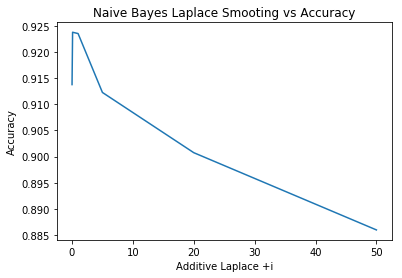

In [34]:
plt.plot(lap,multinb)
plt.title('Naive Bayes Laplace Smooting vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Additive Laplace +i')
plt.show()

I got the best accuracy of 0.9237500000000001 with additive laplace smoothing with 0.1.

In [32]:
all_test_scores = []
for ii in range(40):
    scores = cross_validate(MultinomialNB(0.1), bag_of_words.toarray(), y_all, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None))
    all_test_scores = all_test_scores + list(scores["test_score"])

Bootstrapped Mean: 0.923
Bootstrapped 95% CI: [0.907, 0.939]


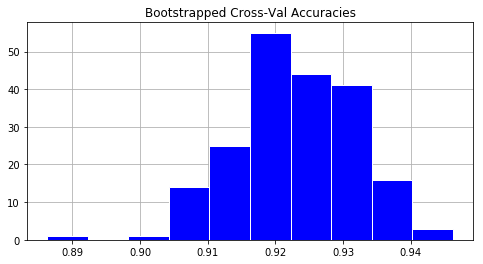

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
pd.DataFrame(all_test_scores).hist(ax=ax, color="blue", edgecolor="white")
ax.set_axisbelow(True)
ax.set_title("Bootstrapped Cross-Val Accuracies")
print("Bootstrapped Mean: {:.3f}".format(np.mean(all_test_scores)))
print("Bootstrapped 95% CI: [{:.3f}, {:.3f}]".format(np.percentile(all_test_scores, 2.5), np.percentile(all_test_scores, 97.5)))

**Part E**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Naive Bayes model. In addition, you should briefly discuss how you found these best features mathematically. 

In [48]:
best_nb = MultinomialNB(0.1).fit(bag_of_words.toarray(), y_all)
top10 = np.argsort(best_nb.coef_[0])[-10:]
bottom10 = np.argsort(best_nb.coef_[0])[:10]
print("---TOP 10 DONALD TRUMP PREDICTORS---")
for ii, index in enumerate(top10):
    print(ii+1,terms[index])
print("---TOP 10 HILARY CLINTONPREDICTORS---")
for ii, index in enumerate(bottom10):
    print(ii+1,terms[index])

---TOP 10 DONALD TRUMP PREDICTORS---
1 people
2 hashtagtrump2016
3 amp
4 trump
5 clinton
6 crooked
7 realdonaldtrump
8 great
9 hillary
10 thank
---TOP 10 HILARY CLINTONPREDICTORS---
1 él
2 fiu
3 rapists
4 fixed
5 fixing
6 rapist
7 flagged
8 flew
9 ranked
10 flint


**Part F**: Which of the two models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

Naive Bayes performed the best on the data set. Both ends of the 95% confidence interval were higher and Naive Bayes as well as the mean. I wasn't surprised by the fact that Naive Bayes performed better, but I was surprised with the top 10 features for predicting Clinton. The top 10 predictors for Clinton are more characteristic of Clinton in the logistic regression model. However, it also makes sense since the very odd predictors for Clinton in the Naive Bayes are probably words that Trump never spoke.

### [25 points] Problem 3: Feature Engineering and Presidential Tweets 
***

In this problem you will again work with the Twitter election data from **Problem 2**, but this time in its unadulterated raw form. Unlike in **Problem 2**, you will only be allowed to use Logistic Regression as your classifier.  Instead of using a fancier model, you will attempt to improve performance by crafting better features.  One way you might do this is to explore text models that are more sophisticated that simple Bag-of-Words. Alternatively, you might explore the training data and identify characteristics of tweets by a particular author that you can then turn into a feature. 

The class `TweetFeaturizer` shown below is already fully functional.  Your goal in this problem is to make it better.  In it's current state, the class reads in the training and test data, fits a Logistic Regression model using Bag-of-Words, makes predictions on the test set, and then dumps the predictions to a csv file that can be uploaded to Kaggle. You are free to modify this class is any way that you see fit, but we've given you some helpful functionality that will prove sufficient for most of you.  The `add_text_features` method currently loops over each tweet in the data set, copies it to a new array, and then passes that array into the text vectorizer.  One way to create new features is to append distinct word-indicators onto the string representing the tweet.  These will then be turned into features by the vectorizer. 

As an example (that is intentionally silly and probably unhelpful): Suppose you think a potentially helpful feature is whether or not the tweet contains more than 10 instances of the letter `z`.  In `add_text_features` you could count the number of `z`'s in a tweet and if there are more than 10, you could append the word `MoreThanTenZs` to the tweet.  Then, when the tweet is passed into the vectorizer, this will turn into a numerical feature.  

In addition to competing against yourself to craft the best features that you can, you'll also compete against your classmates in a Kaggle competition.  The competition page can be found here: 

https://www.kaggle.com/c/4622-election-tweet-authorship

A private invite link will be available on Piazza which will get you into the competition. Note that the test data has been partitioned into a public leaderboard set and a private leaderboard set.  While the competition is open, submitting to Kaggle will tell you your score on the public leaderboard.  Your scores on the private leaderboard will become available at the end of the competition.   The top **THREE** students on the **Private** leaderboard at the end of the competition will earn 10 extra credit points on the Practicum. Note that to prevent the machine learning-equivalent of button mashing, we've limited you to **10** submissions per day.  You should be evaluating your features locally with cross-validation and then submitting to Kaggle when you think you have something that works.  

**Part A**: **Feature Engineering**:  What you need to do: 

- Explore and experiment with the data to try to find good features 
- Implement these features in the `TweetFeaturizer` class  
- Implement some evaluation methods to see how well your features improve your model (*cough* cross-validation *cough*) 
- Make submissions to the Kaggle competition and see how you compared to your classmates 

In [55]:
for i in range(len(examples)):
    print(y_train[i],examples[i])

0 If you're a fan of weekends, thank a union member. https: / / t.co / RUF2UtG2sM
0 No matter where you live, you can make sure you're registered to vote at https: / / t.co / tTgeqxNqYm.… https: / / t.co / tWlu8DiGIg
1 Bernie should pull his endorsement of Crooked Hillary after she decieved him and then attacked him and his supporters.
1 Stopped by @TrumpDC to thank all of the tremendous men &amp; women for their hard work! https: / / t.co / oGcJL4N454
1 With all of the Crooked Hillary Clinton's foreign policy experience, she has made so many mistakes - and I mean real monsters! No more HRC.
1 Heading to North Carolina for two big rallies. Will be there soon. We will bring jobs back where they belong!
1 Crooked Hillary Clinton, perhaps the most dishonest person to have ever run for the presidency, is also one of the all time great enablers!
0 No parent should pay more than 10% of their income on quality child care.
0 We have to face the hard truths about race in America. https: / / t.c

0 "How do you square the things I told you with the picture the Republicans painted of their opponent in Cleveland? You can’t." —@BillClinton
1 Anybody whose mind "SHORT CIRCUITS" is not fit to be our president! Look up the word "BRAINWASHED."
0 "She’s insatiably curious, she’s a natural leader, she’s a good organizer, and she’s the best darn changemaker I’ve seen.” —@BillClinton
0 Qumber's parents came to this country for the American Dream. Trump is a threat to all they've achieved: https: / / t.co / YYXwtX2b4b
1 Will be in Missouri today with Melania for the funeral of a wonderful and truly respected woman, Phyllis S!
1 You have until 8pm to #VoteTrump, Delaware! https: / / t.co / GYeV6m1qOn
0 On average, it takes black women until today to catch up to white men's 2015 earnings. Time to close the pay gap. https: / / t.co / 5eYBD4Y7Mr
0 "Simply caring is not enough. To drive real progress, you have to change both hearts and laws." —Hillary
0 "Hillary is running on the message of hope

0 “This November, I’m voting for a woman…who knows women’s rights are human rights…here at home and around the world.” —@ChelseaClinton
0 "When she didn’t win the nomination 8 years ago, she didn’t get...disillusioned...she proudly stepped up to serve our country." —@FLOTUS
0 “By so many measures, our country is stronger and more prosperous than it was when we started.” —@POTUS
1 I will be interviewed from Cleveland, Ohio, on @seanhannity - Tonight at 10:00 P.M. Enjoy!
0 Trump wants to bring NYC's old, unconstitutional stop-and-frisk policy—aka racial profiling—to a city near you. https: / / t.co / XWHj5xRSiH
0 RT @HFA: Go to https: / / t.co / SvSvlg48vI and register to vote today. Register your friends. Register everyone you know.
0 "I intend to close my campaign the way I began my career: fighting for kids and families..it will be the passion of my presidency." —Hillary
0 "Hillary understands that a college loan is about a lot more than getting a qualified child an education." —@JoeB

1 #CrookedHillary is outspending me by a combined 31 to 1 in Florida, Ohio, &amp; Pennsylvania. I haven't started yet! https: / / t.co / BcoPrwqFMe
0 Addiction is a disease—not a moral failing. We should support those who are struggling with it. #OpioidAwarenessWeek https: / / t.co / V9Uz3jVEjN
0 RT @HFA: The ADA and the notion that workplaces and public spaces belong to everyone was one that Democrats and Republicans could both get…
0 Today is @BillClinton's birthday! It's not too late to sign his card here: https: / / t.co / 30Uxor2066
0 RT @washingtonpost: "I sold Trump $100,000 worth of pianos. Then he stiffed me." https: / / t.co / cKCmIsOPUA via @PostEverything
0 Next week, Hillary will walk on stage for the first presidential debate. Chip in now for the chance to be there: https: / / t.co / mHGncsXG6y
1 I will be interviewed on @meetthepress this morning. Enjoy!
1 I will be interviewed on @CNN @NewDay at 7:30 A.M. Enjoy!
1 Obama just endorsed Crooked Hillary. He wants four more 

In [56]:
f = gzip.open('data/raw_tweets_train.pklz','rb')
examples, y_train = pickle.load(f)
f.close()



log = LogisticRegression(random_state=1234)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))


0.921


In [7]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.916


In [8]:
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(5, 5))
X_train = vectorizer.fit_transform(examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.93875


In [9]:
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95425


In [10]:

new_examples = [] 
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    new_examples.append(ex)
    
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.9280000000000002


In [11]:
new_examples = [] 
import re
for ex in examples:
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    new_examples.append(ex)
    
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.92175


In [12]:
new_examples = [] 
import re
for ex in examples:
    self_centered = False
    matches = re.findall(r"[me]|[I]",ex)
    if len(matches) > 3:
        self_centered=True
    if all_cap_words:
        ex+= ' EgotisticalTrumpLoser'
    new_examples.append(ex)
    
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.921


In [13]:
new_examples = []
import re
for ex in examples:
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    new_examples.append(ex)
    
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(new_examples)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.92925


In [29]:
new_examples = [] 
for ex in examples:
    if ex.find('https:') > -1:
        ex = ex.split(sep, 1)[0]
        ex+= ' ItContainsASiteLink'
    new_examples.append(ex)
    
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.9189999999999999


In [15]:
new_examples = [] 
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95175


In [22]:
new_examples = [] 
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 6))
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.9495000000000001


In [26]:
import string
new_examples = [] 
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    ex = ex.translate(string.punctuation)
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)

log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95175


In [32]:
new_examples = []
import re
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find('https:') > -1:
        ex = ex.split(sep, 1)[0]
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.9517499999999999


In [20]:
new_examples = []
import re
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find('https:') > -1:
        ex = ex.split(sep, 1)[0]
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    if ex.find('" -'):
        ex+= ' HowHilaryEndsQuotes'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.9525


In [50]:
new_examples = []
trumplen=[]
for i in range(len(examples)):
    if y_train[i] == 1:
        trumplen.append(len(examples[i]))
        
import re
for ex in examples:
    sep = 'https:'
    link_namespace = 'https: / / t.co /'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find(link_namespace) > -1:
        ex = ex.strip(link_namespace)
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    if ex.split()[-1].find('#') > -1:
        ex+= ' ItEndsWithAHashtag'
    new_examples.append(ex)
    
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95175


In [33]:
new_examples = []
trumplen=[]

        
import re
for ex in examples:
    sep = 'https:'
    link_namespace = 'https: / / t.co /'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find(link_namespace) > -1:
        ex = ex.strip(link_namespace)
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    new_examples.append(ex)
for i in range(len(examples)):
    if y_train[i] == 1:
        trumplen.append(len(examples[i]))
new_examples2 = []
for ex in new_examples:
    if len(ex) < np.mean(trumplen)-10:
        ex+= ' ItsShortCuzHesDumb'
    new_examples2.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples2)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95175


In [48]:
new_examples = []
import re
for ex in examples:
    sep = 'https:'
    link_namespace = 'https: / / t.co /'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find(link_namespace) > -1:
        ex = ex.strip(link_namespace)
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    if ex.count('!') > 1:
        ex+=' UsesMoreThanOneEx'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples2)
log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
print(np.mean(log_score))

0.95175


In [35]:

lam = [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6]
new_examples = []
import re
for ex in examples:
    sep = 'https:'
    remove_http = ex.split(sep, 1)[0]
    if remove_http.endswith('!'):
        ex += ' ItEndsWithExclamation'
    if ex.find('https:') > -1:
        ex = ex.split(sep, 1)[0]
        ex+= ' ItContainsASiteLink'
    all_cap_words = False
    matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
    for m in matches:
        if len(m) > 7:
            all_cap_words = True
            #print(m)
    if all_cap_words:
        ex+= ' ItContainsAllCapWords'
    new_examples.append(ex)
    
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(2, 5))
X_train = vectorizer.fit_transform(new_examples)
for i in lam:
    log = LogisticRegression(C=i,random_state=1234)
    log_score = cross_val_score(log, X_train.toarray(), y_train, cv=5, scoring='accuracy')
    print(np.mean(log_score))

0.9395
0.9514999999999999
0.95275
0.9495000000000001
0.9477500000000001
0.9477499999999999
0.9475
0.94725


**Part B**: **Motivation and Analysis**: What you need to do: 

Convince me that:

- Your new features work
- You understand what the new features are doing
- You had a clear methodology for incorporating the new features


I remembered watching a video essay about the way Trump tweets (Ref. 2). In that essay, it mentions how Trump ends his tweets in exclamations. He swayed many voters with his strong emotional actions over political policy and logic so this made sense. I tested that out and it helped my accuracy jump a lot. I also knew that Trump would have used ALL CAPS as part of his strategy to convey his emotion in his tweets and I confirmed this in the training set. Clinton used a lot of website links in hers so I made this into a feature as well. I got rid of the link namespace (https: // ...) because I felt it would influence the logistic regression negatively with useless words and characters and substituted with a string that explained there was a link there. I left the end of the URL because Clinton would often link to the same website in her tweets. All these features ended up on the top 10's list for at least either candidate before I experimented with the analyzer for the Count Vectorizer so I feel that this is a good indication that these features work. 

I then experimented with the analyzer 'char_wb' which helps work out kinks in typos and misspelling. I got lucky with my initial guess of the ngram range of (2,5) because it turned out to be the best for accuracy. I tried other ranges that I deleted because those didn't help.

I also tried playing around with the regularization parameter of the logistic regression but even the best accuracy was less than not supplying a parameter at all. The best regularization value I got from that experiment was the default value anyway.

In [54]:
class TweetFeaturizer:
    def __init__(self):
        
        from sklearn.feature_extraction.text import CountVectorizer
        
        self.vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 5))
        
    def add_text_features(self, examples):
        """
        Method for looping over original text and adding new text 
        features. 
        :param examples: the list of raw tweets 
        """
        
        new_examples = [] 
        for ex in examples:
            link_namespace = 'https: / / t.co /'
            sep = 'https:'
            remove_http = ex.split(sep, 1)[0]
            if remove_http.endswith('!'):
                ex += ' ItEndsWithExclamation'
            if ex.find('https:') > -1:
                ex = ex.strip(link_namespace)
                ex+= ' ItContainsASiteLink'
            all_cap_words = False
            matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
            for m in matches:
                if len(m) > 7:
                    all_cap_words = True
            #print(m)
            if all_cap_words:
                ex+= ' ItContainsAllCapWords'
            new_examples.append(ex)
        return new_examples

    def build_train_features(self, examples):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: the list of raw tweets 
        """
        
        new_examples = self.add_text_features(examples)
        return self.vectorizer.fit_transform(new_examples)

    def get_test_features(self, examples):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: the list of raw tweets
        """
        new_examples = self.add_text_features(examples)
        return self.vectorizer.transform(new_examples)

    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = np.asarray(self.vectorizer.get_feature_names())
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("DT: %s" % " ".join(feature_names[top10]))
        print("HC: %s" % " ".join(feature_names[bottom10]))
                
    def train_model(self, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        from sklearn.linear_model import LogisticRegression 
        
        # load data 
        f = gzip.open('data/raw_tweets_train.pklz','rb')
        text_train, y_train = pickle.load(f)
        f.close()
        
        # get training features and labels 
        self.X_train = self.build_train_features(text_train)
        self.y_train = y_train
        
        # train logistic regression model.  !!MUST USE LogisticRegression!! 
        self.logreg = LogisticRegression(C=1,random_state=random_state)
        self.logreg.fit(self.X_train, self.y_train)
        
    def model_predict(self):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        
        # read in test data 
        f = gzip.open('data/raw_tweets_test.pklz','rb')
        text_valid = pickle.load(f)
        f.close()
        
        # featurize test data 
        self.X_test = self.get_test_features(text_valid)
        
        # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        
        # dump predictions to file for submission to Kaggle  
        pd.DataFrame({"realDonaldTrump": np.array(pred, dtype=bool)}).to_csv("prediction.csv", index=True, index_label="Id")
        

# Instantiate the class 
feat = TweetFeaturizer()

# Train your Logistic Regression classifier 
feat.train_model(random_state=1234)

# Show the top 10 features for each class 
feat.show_top10()

# Make prediction on test data and produce Kaggle submission file 
feat.model_predict()

DT:  -   j ank  i  i   # "@  "@ -  ! 
HC:  — —@ ”   —@  rt  rt   trum .” .”   tru


In [51]:
import re
class TweetFeaturizerWithoutChar_WB:
    def __init__(self):
        
        from sklearn.feature_extraction.text import CountVectorizer
        
        self.vectorizer = CountVectorizer()
        
    def add_text_features(self, examples):
        """
        Method for looping over original text and adding new text 
        features. 
        :param examples: the list of raw tweets 
        """
        
        new_examples = [] 
        for ex in examples:
            
            sep = 'https:'
            link_namespace = 'https: / / t.co /'
            remove_http = ex.split(sep, 1)[0]
            if remove_http.endswith('!'):
                ex += ' ItEndsWithExclamation'
            if ex.find('https:') > -1:
                #ex = ex.split(sep, 1)[0]
                ex = ex.strip(link_namespace)
                ex+= ' ItContainsASiteLink'
            all_cap_words = False
            matches = re.findall(r"(\b[A-Z]+\b(?:\s+[A-Z]+\b)*)",ex)
            for m in matches:
                if len(m) > 7:
                    all_cap_words = True
            #print(m)
            if all_cap_words:
                ex+= ' ItContainsAllCapWords'
            new_examples.append(ex)
        return new_examples

    def build_train_features(self, examples):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: the list of raw tweets 
        """
        
        new_examples = self.add_text_features(examples)
        return self.vectorizer.fit_transform(new_examples)

    def get_test_features(self, examples):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: the list of raw tweets
        """
        new_examples = self.add_text_features(examples)
        return self.vectorizer.transform(new_examples)

    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = np.asarray(self.vectorizer.get_feature_names())
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("DT: %s" % " ".join(feature_names[top10]))
        print("HC: %s" % " ".join(feature_names[bottom10]))
                
    def train_model(self, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        from sklearn.linear_model import LogisticRegression 
        
        # load data 
        f = gzip.open('data/raw_tweets_train.pklz','rb')
        text_train, y_train = pickle.load(f)
        f.close()
        
        # get training features and labels 
        self.X_train = self.build_train_features(text_train)
        self.y_train = y_train
        
        # train logistic regression model.  !!MUST USE LogisticRegression!! 
        self.logreg = LogisticRegression(C=1,random_state=random_state)
        self.logreg.fit(self.X_train, self.y_train)
        
    def model_predict(self):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        
        # read in test data 
        f = gzip.open('data/raw_tweets_test.pklz','rb')
        text_valid = pickle.load(f)
        f.close()
        
        # featurize test data 
        self.X_test = self.get_test_features(text_valid)
        
        # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        
        # dump predictions to file for submission to Kaggle  
        pd.DataFrame({"realDonaldTrump": np.array(pred, dtype=bool)}).to_csv("prediction.csv", index=True, index_label="Id")
        

# Instantiate the class 
feat = TweetFeaturizerWithoutChar_WB()

# Train your Logistic Regression classifier 
feat.train_model(random_state=1234)

# Show the top 10 features for each class 
feat.show_top10()


DT: clinton crookedhillary realdonaldtrump americafirst thank trump2016 makeamericagreatagain itcontainsallcapwords crooked itendswithexclamation
HC: timkaine potus demsinphilly rt barack joebiden hillary billclinton ttgeqxnqym itcontainsasitelink


### References
***



Ref 1. https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

Ref 2. https://www.youtube.com/watch?v=geEVwslL-YY

Ref 3. https://stackoverflow.com/posts/43523649/revisions